# Initialization

In [2]:
from math import *
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.ticker
import pandas as pd

In [3]:
pd.set_option("display.max_rows", 300)
pd.set_option("display.max_columns", 6)
pd.set_option('display.float_format', '{:.6e}'.format)

# Data extraction

There are different files from which one would want to extract data:

- Original .dat file sent by Anatoli Fedynitch with NA61/SHINE datasets for charged pions, charged kaons and (anti-)protons at 158 and 350 GeV/c
- Simulated datasets in the Rivet format .yoda, using different hadronic interaction models (EPOS 1.99, EPOS-LHC, Sibyll 2.1, Sibyll 2.3d, QGSJet-II.04, Pythia8, etc ...)
- Future HepData official .yoda entry with complete identified outgoing particles

In order to extract the datasets, one needs to consider the original format of the .dat file. It was sent by Anatoli Fedynitch. The file has a maximum of five columns separated by one or two spaces, which will be used to define the dataframe and fill it immediately using the `pd.read_csv()` function and the separator `delim_whitespace` activated.

In [4]:
col = []
for i in range (5):
    col.append('c%i' %(i))

df = pd.read_csv('NA61SHINE_2022_I2155140.dat', delim_whitespace=True, names=col)
df.columns = ['x', 'y', 'ystat', 'ysys-', 'ysys+']

Secondly, one needs to deal with numbers and not strings. Therefore a conversion to numerical values is done using the functionality `pd.to_numeric`.

In [5]:
dfn = df.apply(pd.to_numeric, errors='coerce', axis=1)
#display(dfn)

,x,y,ystat,ysys-,ysys+
0,NaN,NaN,1.580000e+02,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,1.420000e+00,7.820000e-01,9.480000e-03,4.490000e-02,3.260000e-02
4,2.200000e+00,7.780000e-01,5.400000e-03,2.510000e-02,2.210000e-02
5,2.620000e+00,8.100000e-01,2.290000e-03,2.130000e-02,1.880000e-02
6,3.080000e+00,8.030000e-01,5.330000e-03,1.940000e-02,1.520000e-02
7,3.600000e+00,7.900000e-01,1.810000e-03,2.240000e-02,1.690000e-02
8,4.340000e+00,7.820000e-01,1.540000e-03,2.300000e-02,1.620000e-02
9,5.550000e+00,7.650000e-01,1.140000e-03,2.540000e-02,1.700000e-02


In [ ]:
#energy

#for i in range (len(df)) :
#    if (dfn.ystat.iloc[i]==158) :
#        print('158 @ index', dfn.index[i])
#    elif (dfn.ystat.iloc[i]==350) :
#        print('350 @ index', dfn.index[i])        

In [ ]:
#for i in range (len(dfn)) :
#    if (dfn.ystat.iloc[i]==158 and dfn.ystat.iloc[i]==350) :     

One calculates the total error bars, merging together contributions from statistic and systematic errors following the formula $\Delta_{\text{tot}} = \sqrt{{\Delta_{\text{stat}}}^2 + {\Delta_{\text{sys}}}^2}$ for both upper and lower parts.

In [5]:
dfn.loc[:,'yerrm'] = sqrt((dfn['ystat'])**2 + (dfn['ysys-'])**2)
dfn.loc[:,'yerrp'] = sqrt((dfn['ystat'])**2 + (dfn['ysys+'])**2)

The x-axis binning was sent by Michael Unger at a later time and is implemented as a `list` with the values.

In [14]:
dfc = dfn
dfc = dfc.drop(['ystat', 'ysys-', 'ysys+'], axis=1)
dfc.insert(1, 'xerrm', 0.000000e+00)
dfc.insert(2, 'xerrp', 0.000000e+00)
    
xbin = [0.1, 0.1318, 0.1622, 0.1995, 0.2512, 0.3162, 0.3890, 0.4786, 0.6026, 0.7586, 0.9550, 1.259, 1.585, 1.995, 2.399, 2.851, 3.311, 3.890, 4.786, 6.310, 7.943, 10., 12.59, 15.85, 19.95, 25.12, 31.62, 39.81, 50.12, 63.10, 79.43, 100., 125.9, 158.5, 199.5, 251.2, 316.2]

for i in range (0, len(dfc)) :
    for j in range (0, len(xbin)-1):
        if (dfc.x.loc[i]>xbin[j] and dfc.x.loc[i]<xbin[j+1] and xbin[j]<xbin[j+1] ):
            dfc.xerrm.loc[i] = dfc.x.loc[i]-xbin[j]
            dfc.xerrp.loc[i] = xbin[j+1]-dfc.x.loc[i]

dfc = dfc.rename(columns={"xerrm": "xerr-", "xerrp": "xerr+", "yerrm": "yerr-", "yerrp": "yerr+"})   
dfc = dfc.to_string(index=False)
#print(dfc)

In [7]:
j= 0
k = l = m = n = o = p = 0
q = r = s = t = u = v = 0

for i in range (0,223) :
    if (j>3 and j<21) :
        print(k, ': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        k=k+1
    if (j>25 and j<42) :
        print(l,': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        l=l+1
    if (j>46 and j<58) :
        print(m,': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        m=m+1
    if (j>62 and j<75) :
        print(n,': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        n=n+1
    if (j>79 and j<94) :
        print(o,': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        o=o+1
    if (j>98 and j<111) :
        print(p,': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        p=p+1
        
    if (j>115 and j<133) :
        print(q, ': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        q=q+1
    if (j>137 and j<155) :
        print(r,': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        r=r+1
    if (j>159 and j<170) :
        print(s,': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        s=s+1
    if (j>174 and j<187) :
        print(t,': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        t=t+1
    if (j>191 and j<206) :
        print(u,': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        u=u+1
    if (j>210 and j<223) :
        print(v,': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        v=v+1
        
    j=j+1

0 : {stat: {dn: 0.0054 , up: 0.0054 }, sys: {dn: 0.0251 , up: 0.0221 }},
1 : {stat: {dn: 0.00229 , up: 0.00229 }, sys: {dn: 0.0213 , up: 0.0188 }},
2 : {stat: {dn: 0.00533 , up: 0.00533 }, sys: {dn: 0.0194 , up: 0.0152 }},
3 : {stat: {dn: 0.00181 , up: 0.00181 }, sys: {dn: 0.0224 , up: 0.0169 }},
4 : {stat: {dn: 0.00154 , up: 0.00154 }, sys: {dn: 0.023 , up: 0.0162 }},
5 : {stat: {dn: 0.00114 , up: 0.00114 }, sys: {dn: 0.0254 , up: 0.017 }},
6 : {stat: {dn: 0.00115 , up: 0.00115 }, sys: {dn: 0.0199 , up: 0.0167 }},
7 : {stat: {dn: 0.00109 , up: 0.00109 }, sys: {dn: 0.016 , up: 0.0151 }},
8 : {stat: {dn: 0.00102 , up: 0.00102 }, sys: {dn: 0.0124 , up: 0.0129 }},
9 : {stat: {dn: 0.00096 , up: 0.00096 }, sys: {dn: 0.01 , up: 0.0106 }},
10 : {stat: {dn: 0.000895 , up: 0.000895 }, sys: {dn: 0.00847 , up: 0.00875 }},
11 : {stat: {dn: 0.000822 , up: 0.000822 }, sys: {dn: 0.00706 , up: 0.00715 }},
12 : {stat: {dn: 0.000753 , up: 0.000753 }, sys: {dn: 0.00607 , up: 0.00593 }},
13 : {stat: {dn: 

# Plotting

In [ ]:
#fig, axs = plt.subplots(3, 2, figsize=(8,12), dpi=100)

#for i in range(0,12):
#    ax = plt.subplot(3,2,i%2+1);
#    plt.plot(dfd[i], dfd[i+1])

Text(0.01, 0, '$\\pi^{-}+C \\rightarrow p^{-}+X$ @ 158 GeV')

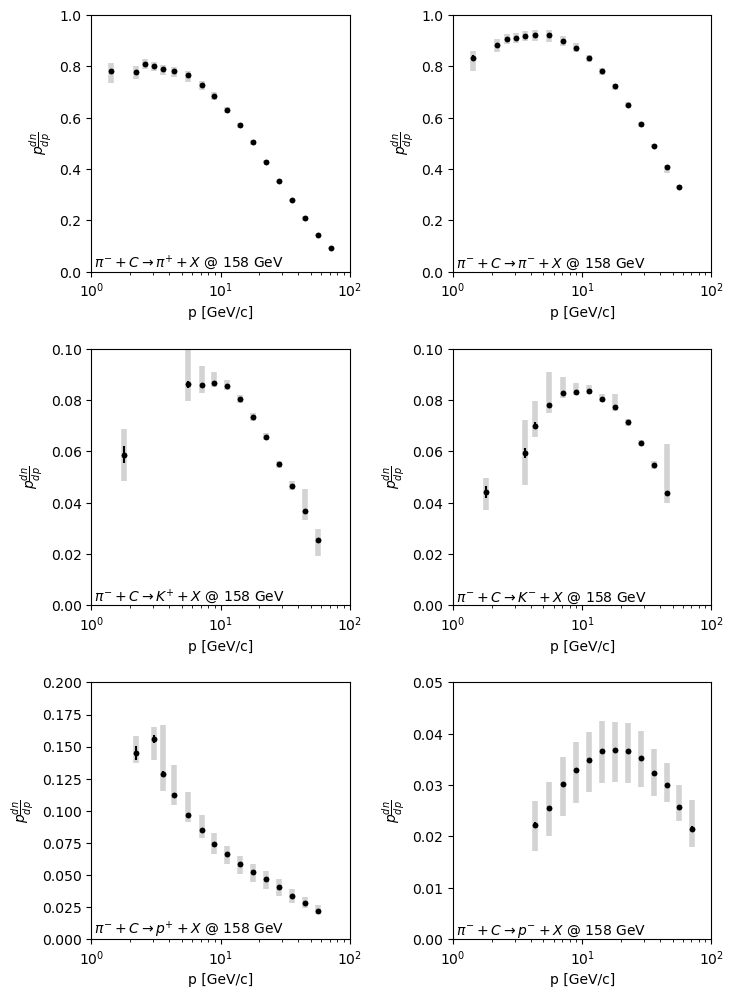

In [12]:
fig, axs  = plt.subplots(3, 2, figsize=(8,12), dpi=100)
fig.subplots_adjust(hspace=0.3, wspace=0.4)

ax = plt.subplot(321)
plt.errorbar(dfn.x[3:21], dfn.y[3:21], yerr=[dfn['ysys-'][3:21],dfn['ysys+'][3:21]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[3:21], dfn.y[3:21], yerr=dfn.ystat[3:21], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,1)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax.text(0.01, 0, r'$\pi^{-}+C \rightarrow \pi^{+}+X$ @ 158 GeV', transform=ax.transAxes, fontsize=10, va='bottom')

ax1 = plt.subplot(322)
plt.errorbar(dfn.x[25:42], dfn.y[25:42], yerr=[dfn['ysys-'][25:42], dfn['ysys+'][25:42]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[25:42], dfn.y[25:42], yerr=dfn.ystat[25:42], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,1)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax1.text(0.01, 0, r'$\pi^{-}+C \rightarrow \pi^{-}+X$ @ 158 GeV', transform=ax1.transAxes, fontsize=10, va='bottom')

ax2 = plt.subplot(323)
plt.errorbar(dfn.x[46:58], dfn.y[46:58], yerr=[dfn['ysys-'][46:58],dfn['ysys+'][46:58]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[46:58], dfn.y[46:58], yerr=dfn.ystat[46:58], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,0.1)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax2.text(0.01, 0, r'$\pi^{-}+C \rightarrow K^{+}+X$ @ 158 GeV', transform=ax2.transAxes, fontsize=10, va='bottom')

ax3 = plt.subplot(324)
plt.errorbar(dfn.x[62:75], dfn.y[62:75], yerr=[dfn['ysys-'][62:75],dfn['ysys+'][62:75]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[62:75], dfn.y[62:75], yerr=dfn.ystat[62:75], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,0.1)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax3.text(0.01, 0, r'$\pi^{-}+C \rightarrow K^{-}+X$ @ 158 GeV', transform=ax3.transAxes, fontsize=10, va='bottom')

ax4 = plt.subplot(325)
plt.errorbar(dfn.x[79:94], dfn.y[79:94], yerr=[dfn['ysys-'][79:94],dfn['ysys+'][79:94]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[79:94], dfn.y[79:94], yerr=dfn.ystat[79:94], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,0.2)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax4.text(0.01, 0, r'$\pi^{-}+C \rightarrow p^{+}+X$ @ 158 GeV', transform=ax4.transAxes, fontsize=10, va='bottom')

ax5 = plt.subplot(326)
plt.errorbar(dfn.x[98:111], dfn.y[98:111], yerr=[dfn['ysys-'][98:111],dfn['ysys+'][98:111]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[98:111], dfn.y[98:111], yerr=dfn.ystat[98:111], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,0.05)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax5.text(0.01, 0, r'$\pi^{-}+C \rightarrow p^{-}+X$ @ 158 GeV', transform=ax5.transAxes, fontsize=10, va='bottom')

Text(0.01, 0, '$\\pi^{-}+C \\rightarrow p^{-}+X$ @ 350 GeV')

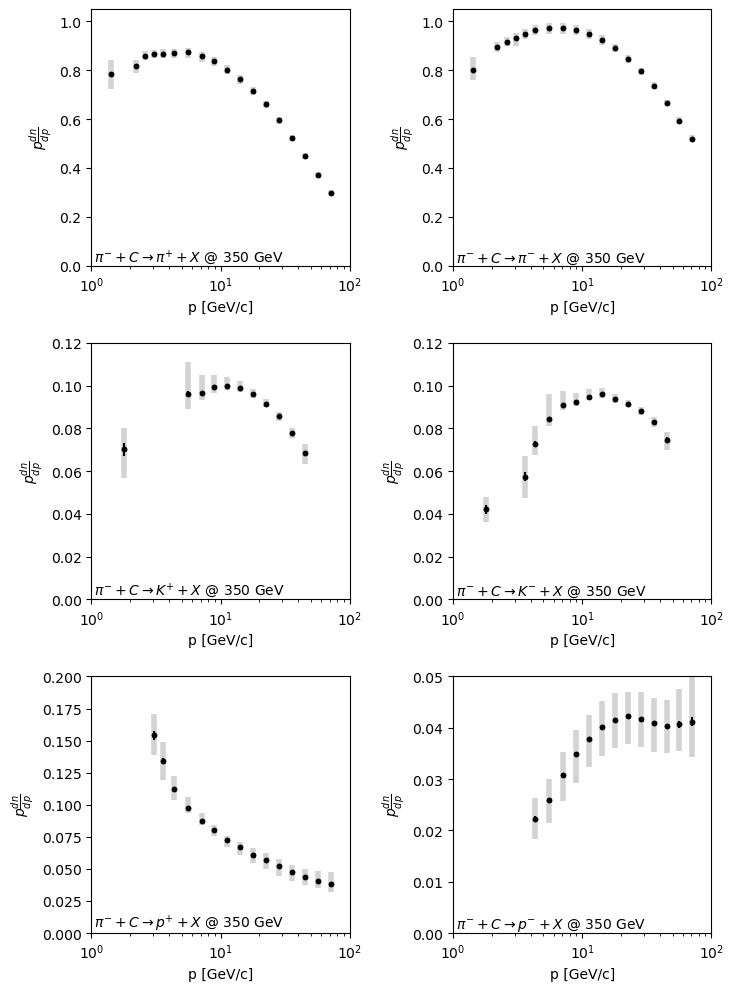

In [13]:
fig, axs  = plt.subplots(3, 2, figsize=(8,12), dpi=100)
fig.subplots_adjust(hspace=0.3, wspace=0.4)

ax = plt.subplot(321)
plt.errorbar(dfn.x[115:133], dfn.y[115:133], yerr=[dfn['ysys-'][115:133], dfn['ysys+'][115:133]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[115:133], dfn.y[115:133], yerr=dfn.ystat[115:133], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,1.05)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax.text(0.01, 0, r'$\pi^{-}+C \rightarrow \pi^{+}+X$ @ 350 GeV', transform=ax.transAxes, fontsize=10, va='bottom')

ax1 = plt.subplot(322)
plt.errorbar(dfn.x[137:155], dfn.y[137:155], yerr=[dfn['ysys-'][137:155], dfn.yerrp[137:155]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[137:155], dfn.y[137:155], yerr=dfn.ystat[137:155], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,1.05)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax1.text(0.01, 0, r'$\pi^{-}+C \rightarrow \pi^{-}+X$ @ 350 GeV', transform=ax1.transAxes, fontsize=10, va='bottom')

ax2 = plt.subplot(323)
plt.errorbar(dfn.x[159:170], dfn.y[159:170], yerr=[dfn['ysys-'][159:170], dfn['ysys+'][159:170]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[159:170], dfn.y[159:170], yerr=dfn.ystat[159:170], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,0.12)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax2.text(0.01, 0, r'$\pi^{-}+C \rightarrow K^{+}+X$ @ 350 GeV', transform=ax2.transAxes, fontsize=10, va='bottom')

ax3 = plt.subplot(324)
plt.errorbar(dfn.x[174:187], dfn.y[174:187], yerr=[dfn['ysys-'][174:187], dfn['ysys+'][174:187]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[174:187], dfn.y[174:187], yerr=dfn.ystat[174:187], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,0.12)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax3.text(0.01, 0, r'$\pi^{-}+C \rightarrow K^{-}+X$ @ 350 GeV', transform=ax3.transAxes, fontsize=10, va='bottom')

ax4 = plt.subplot(325)
plt.errorbar(dfn.x[191:206], dfn.y[191:206], yerr=[dfn['ysys-'][191:206], dfn['ysys+'][191:206]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[191:206], dfn.y[191:206], yerr=dfn.ystat[191:206], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,0.2)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax4.text(0.01, 0, r'$\pi^{-}+C \rightarrow p^{+}+X$ @ 350 GeV', transform=ax4.transAxes, fontsize=10, va='bottom')

ax5 = plt.subplot(326)
plt.errorbar(dfn.x[210:223], dfn.y[210:223], yerr=[dfn['ysys-'][210:223], dfn['ysys+'][210:223]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[210:223], dfn.y[210:223], yerr=dfn.ystat[210:223], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,0.05)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax5.text(0.01, 0, r'$\pi^{-}+C \rightarrow p^{-}+X$ @ 350 GeV', transform=ax5.transAxes, fontsize=10, va='bottom')